## DT Demo

- Build and visualize the tree
- Extract rules
- Prune the tree and do hyperparameter tuning

In [6]:
import pandas as pd
df = pd.read_csv("dm_c.csv")

In [13]:
df.isnull().sum()

Age           0
Gender        0
OwnHome       0
Married       0
Location      0
Salary        0
Children      0
History     303
Catalogs      0
Cust_Id       0
Is_Good       0
dtype: int64

In [7]:
df.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,Cust_Id,Is_Good
0,Old,Female,Own,Single,Far,47500,0,High,6,247,0
1,Middle,Male,Rent,Single,Close,63600,0,High,6,127,1
2,Young,Female,Rent,Single,Close,13500,0,Low,18,479,0
3,Middle,Male,Own,Married,Close,85600,1,High,18,475,1
4,Middle,Female,Own,Single,Close,68400,0,High,12,151,1


In [14]:
df['History'].fillna("new_cust",inplace=True)

In [15]:
df_dummy = pd.get_dummies(df,drop_first=True)

In [16]:
df_dummy.head()

,Salary,Children,Catalogs,Cust_Id,Is_Good,Age_Old,Age_Young,Gender_Male,OwnHome_Rent,Married_Single,Location_Far,History_Low,History_Medium,History_new_cust
0,47500,0,6,247,0,1,0,0,0,1,1,0,0,0
1,63600,0,6,127,1,0,0,1,1,1,0,0,0,0
2,13500,0,18,479,0,0,1,0,1,1,0,1,0,0
3,85600,1,18,475,1,0,0,1,0,0,0,0,0,0
4,68400,0,12,151,1,0,0,0,0,1,0,0,0,0


In [17]:
### Split the data into train and test parts
from sklearn.model_selection import train_test_split

In [22]:
X = df_dummy.drop(['Cust_Id','Is_Good'],axis=1).values
y = df_dummy['Is_Good'].values

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=200)

In [24]:
### Build a decision tree model
from sklearn import tree

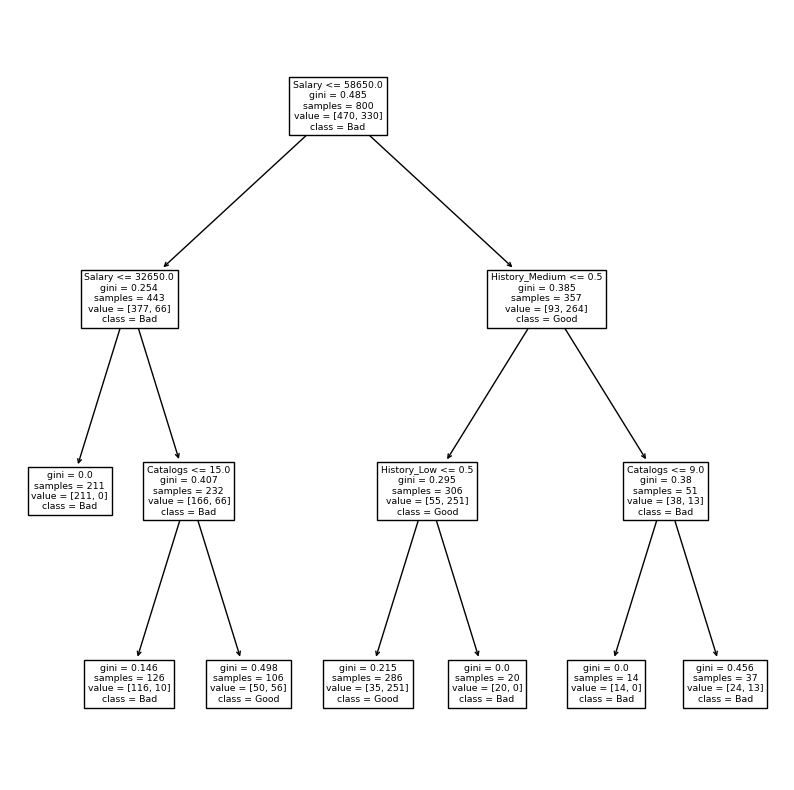

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))  # set plot size (denoted in inches)
tree.plot_tree(clf,class_names=['Bad','Good'],proportion=False,
               feature_names=df_dummy.drop(['Cust_Id','Is_Good'],axis=1).columns)
plt.show()

In [42]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train,y_train)

In [44]:
### How do we decide the value of max depth?
from sklearn.model_selection import GridSearchCV

In [45]:
param_grid = {'max_depth':[2,3,4,5,6,7,8]}
clf = GridSearchCV(tree.DecisionTreeClassifier(),param_grid=param_grid,n_jobs=-1,cv=5)
clf = clf.fit(X_train,y_train)

In [46]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=6)

In [47]:
### Measure performance
from sklearn.metrics import confusion_matrix, roc_auc_score

In [51]:
pred_prob = clf.predict_proba(X_test)[:,1]

In [52]:
roc_auc_score(y_test,pred_prob)

0.9228897001880738

In [53]:
pred_labels = list(map(lambda x:1 if x>=0.5 else 0,pred_prob))

In [55]:
confusion_matrix(y_test,pred_labels)

array([[120,  11],
       [ 16,  53]], dtype=int64)

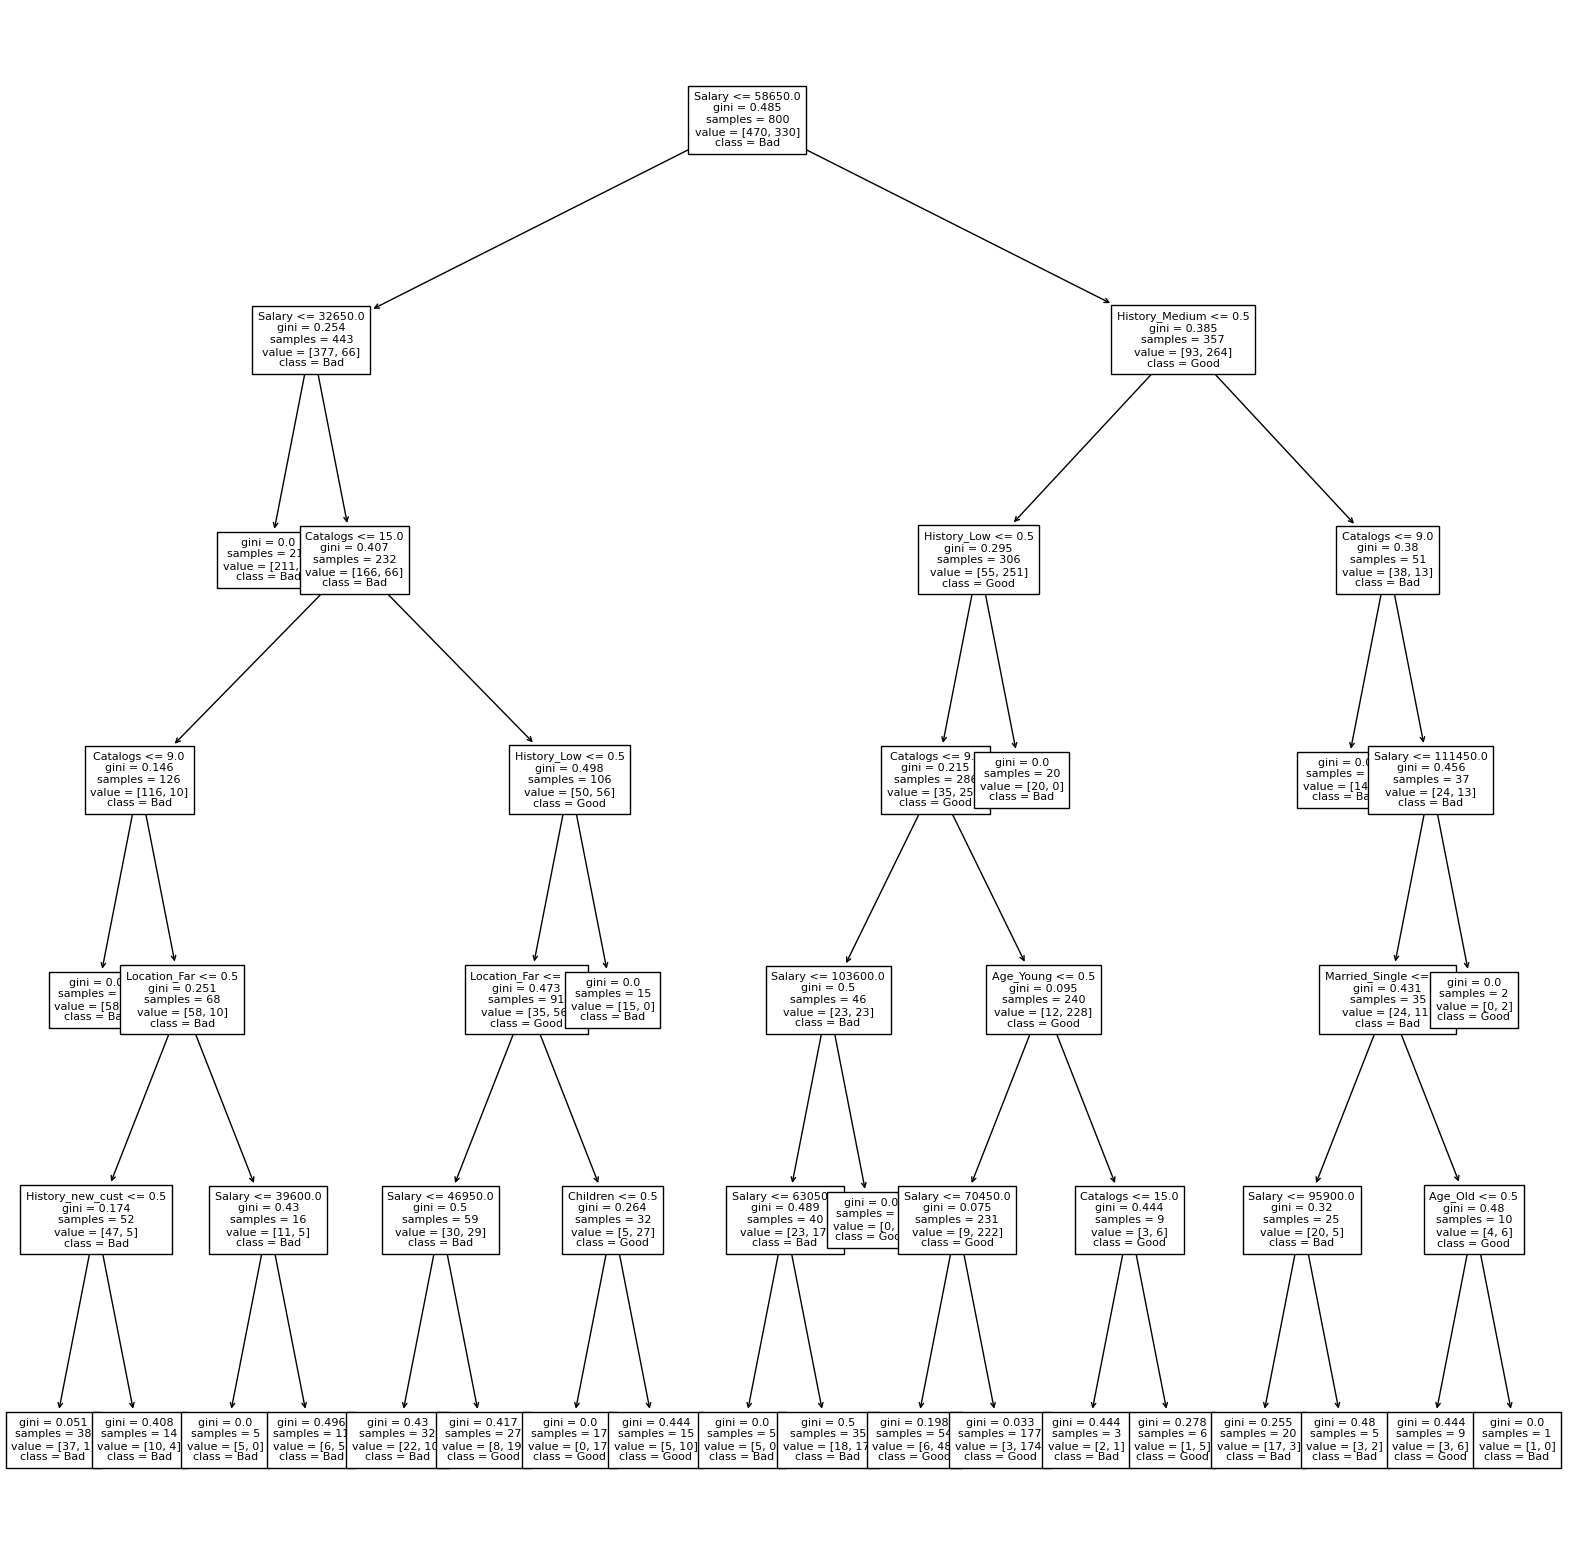

In [63]:
### Prune the tree, you may need to do this incase the cross validated tree is too big to extract rules out of
### And rule extraction is needed
plt.figure(figsize=(20,20))  # set plot size (denoted in inches)
tree.plot_tree(clf.best_estimator_,class_names=['Bad','Good'],proportion=False,
               feature_names=df_dummy.drop(['Cust_Id','Is_Good'],axis=1).columns,fontsize=8)
plt.show()

In [64]:
clf1=tree.DecisionTreeClassifier(max_depth=4)
clf1=clf1.fit(X_train,y_train)

In [65]:
pred_prob = clf1.predict_proba(X_test)[:,1]
roc_auc_score(y_test,pred_prob)

0.917800641663901

In [66]:
pred_labels = list(map(lambda x:1 if x>=0.5 else 0,pred_prob))
confusion_matrix(y_test,pred_labels)

array([[108,  23],
       [  6,  63]], dtype=int64)

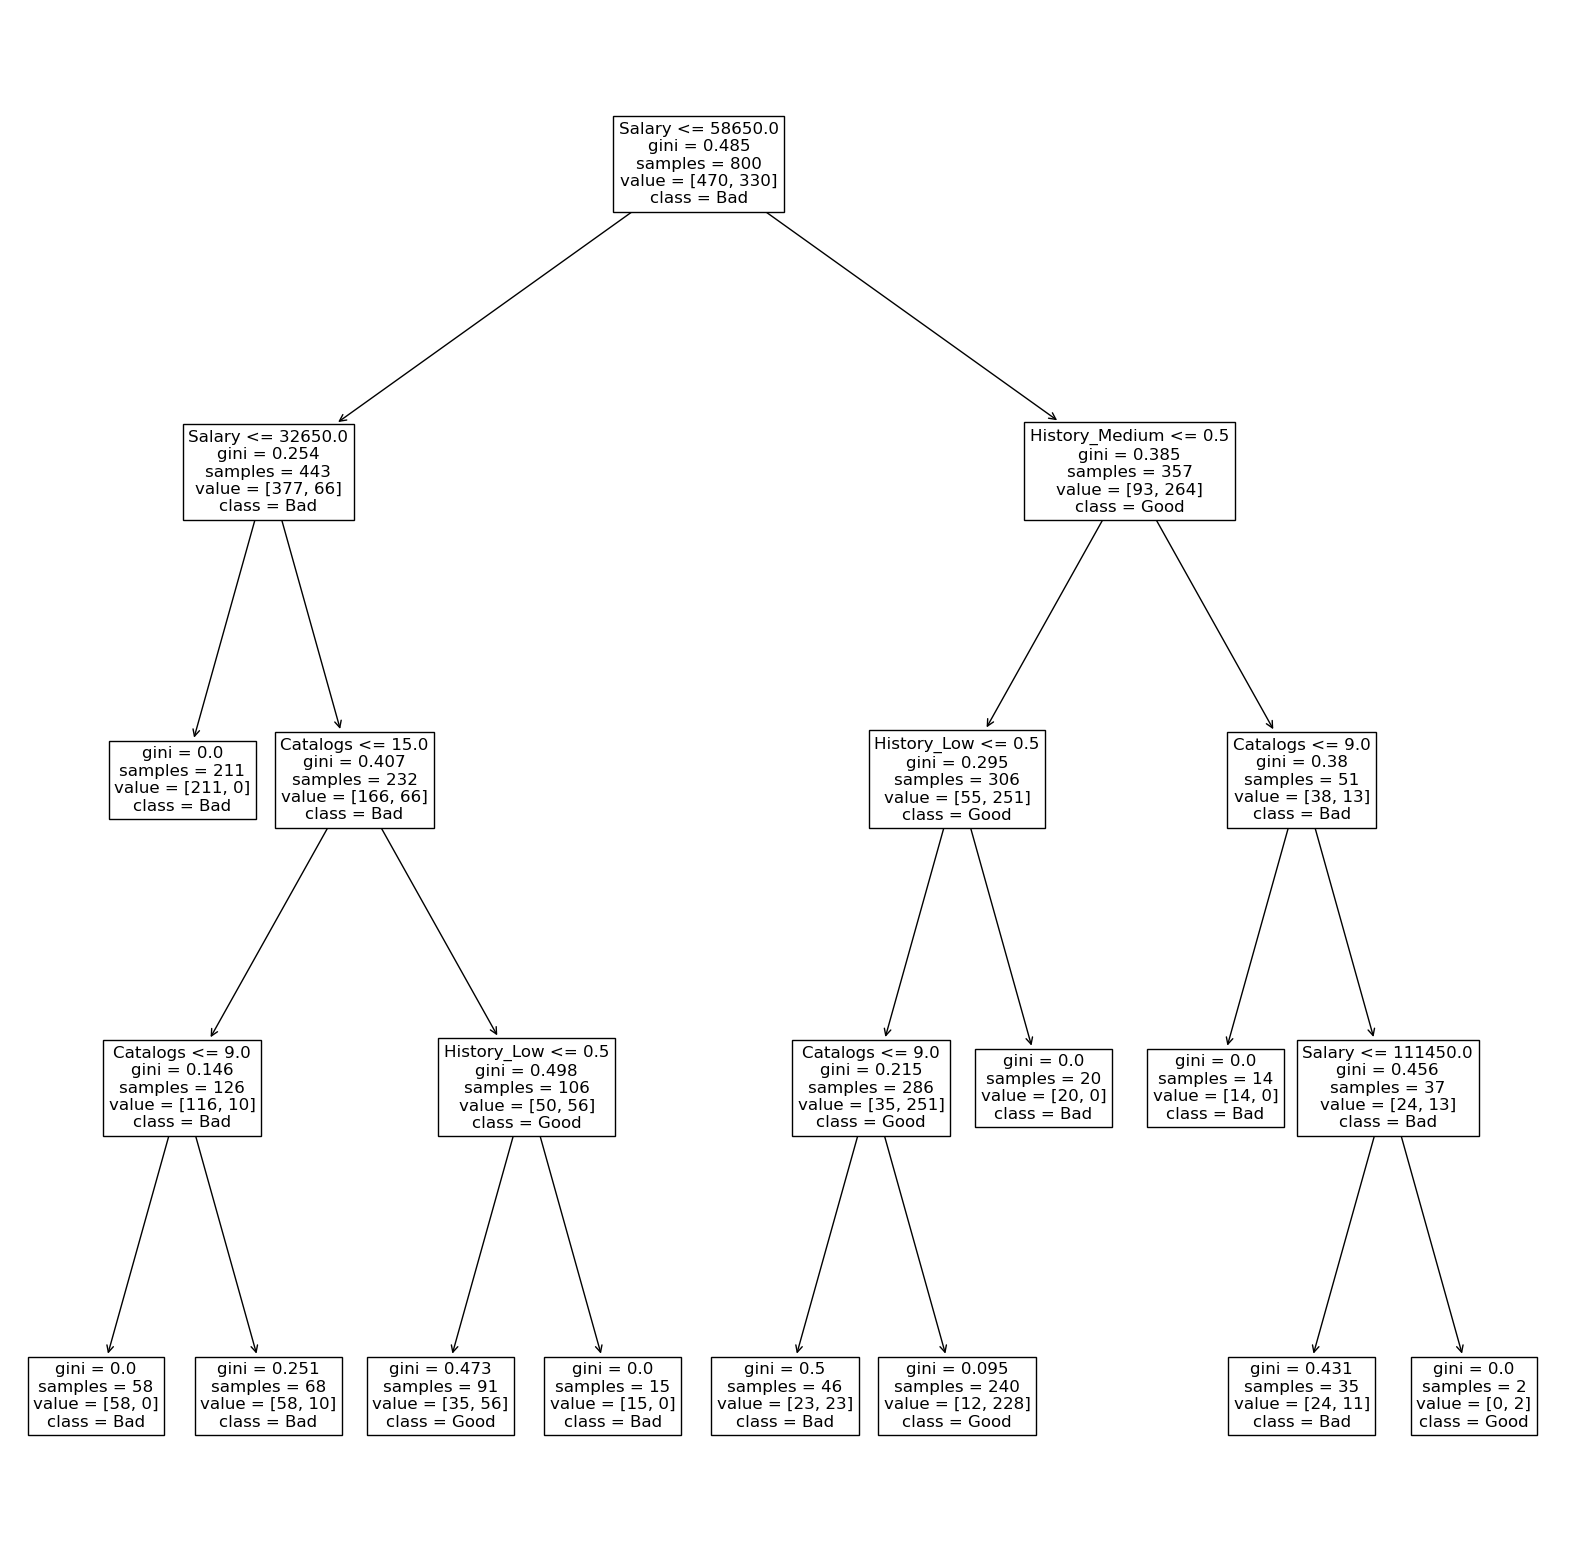

In [68]:
plt.figure(figsize=(20,20))  # set plot size (denoted in inches)
tree.plot_tree(clf1,class_names=['Bad','Good'],proportion=False,
               feature_names=df_dummy.drop(['Cust_Id','Is_Good'],axis=1).columns,fontsize=12)
plt.show()